<a href="https://colab.research.google.com/github/munira1413/Masar-/blob/main/Project_2ML(Mobile_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I

>اسم المشروع
>>اسم الاعضاء في الريق

```
اسم الداتاست ونبذه عنها

The source: (رابط المصدر للداتاست ).


DataSet Description
وصف لكل الفيتشر في الداتاست

```

## 1- Data Cleaning

In [8]:
url = 'https://filebin.net/1jdsmjv7ad0ymlaz/Mobile_Price_Classification_TRAIN.csv'
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv(url)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
#data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#data.head()
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
#data.tail()
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [12]:
#The column

data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
#Check the null (missing values)
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
#Total of each culumn
data.sum()

battery_power    2477037.0
blue                 990.0
clock_speed         3044.5
dual_sim            1019.0
fc                  8619.0
four_g              1043.0
int_memory         64093.0
m_dep               1003.5
mobile_wt         280498.0
n_cores             9041.0
pc                 19833.0
px_height        1290216.0
px_width         2503031.0
ram              4248426.0
sc_h               24613.0
sc_w               11534.0
talk_time          22022.0
three_g             1523.0
touch_screen        1006.0
wifi                1014.0
price_range         3000.0
dtype: float64

In [15]:
#Check for duplicate rows
data.duplicated().sum()

0

In [16]:
#Check for outliers (Five point summury)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


```
# No outliers
```


In [17]:
# Check for inconsistencies
print(data.value_counts())

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram   sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
501            0     2.3          0         12  1       54          0.3    131        4        19  504        1089      2346  13    12    2          1        0             1     1              1
1494           0     1.9          0         2   1       47          0.4    129        2        9   207        1177      3202  13    1     14         1        0             0     3              1
1504           0     1.9          1         7   1       25          0.3    152        4        9   395        1853      1788  13    11    13         1        0             1     1              1
                     1.5          0         12  1       34          0.7    142        8        15  507        973       2806  7     2     7          1        0             1     2              1
1503           1     0.7      

In [18]:
#data.describe
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Correlation Matrix

## 2- Data Processing

In [19]:
#Check data types before Processing
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [20]:
#Data Processing
x=data.drop(['price_range'],axis=1)
y=data['price_range']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)
test = sc.fit_transform(test)

NameError: name 'test' is not defined

### Normalization

```
# Normalization is the process of scaling numerical features to have a mean of 0 and a standard deviation of 1.
# This process is done to ensure that the features contribute equally to the analysis.
```

In [ ]:
columns_to_normalize = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
#Normalization using standardscaler
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
data

In [ ]:
#Scaling to a specific rang [0,1] using MinMax Scaler
min_max_scaler = MinMaxScaler()
data[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

In [ ]:
data.head()

In [ ]:
#Data after cleaning , processing and Normalization
data

### Save the cleaned dataset


In [ ]:
# Save the cleaned dataset to the new CSV file.
data.to_csv('Mobile_Price_clean_dia.csv')

## 3- Data Visualization

In [44]:
url
data=pd.read_csv(url)
display(data)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Scatterplot

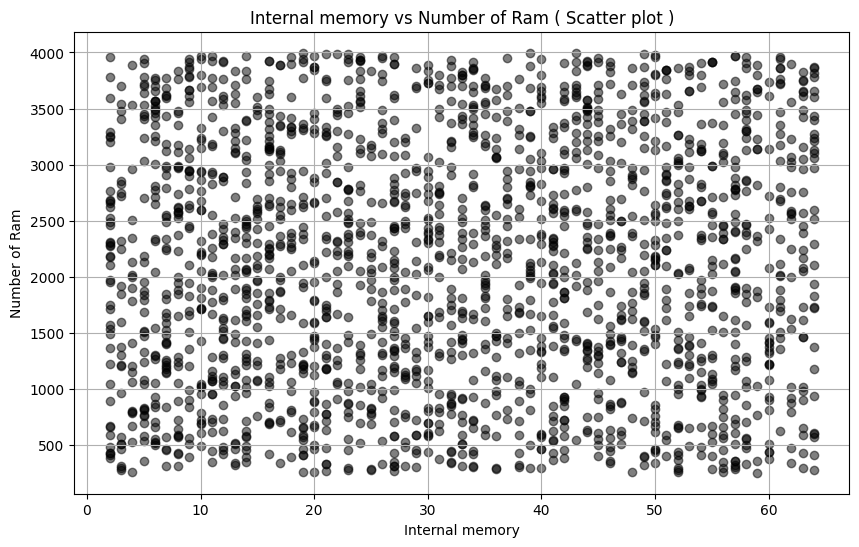

In [45]:
#scatter plot for Internal memory vs Number of Ram
plt.figure(figsize=(10,6))
plt.scatter(data["int_memory"], data["ram"] , color = "black" , alpha = 0.5)
plt.xlabel("Internal memory")
plt.ylabel("Number of Ram")
plt.title("Internal memory vs Number of Ram ( Scatter plot )")
plt.grid(True)
plt.show()

### Boxplot

<Axes: ylabel='battery_power'>

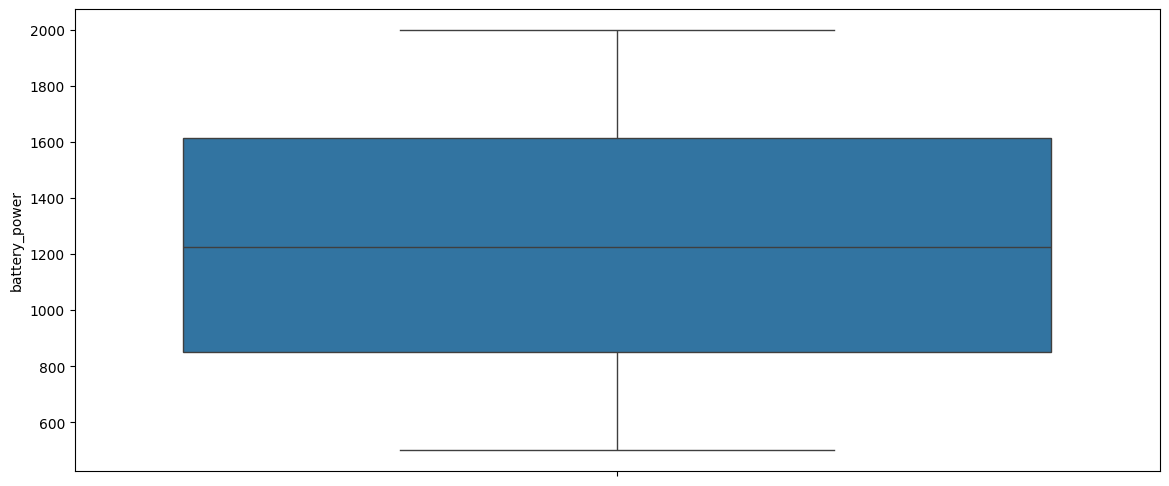

In [39]:

plt.figure(figsize=(14,6))
sns.boxplot(data.battery_power)

### Histogram

## Barplot

<Axes: xlabel='price_range', ylabel='ram'>

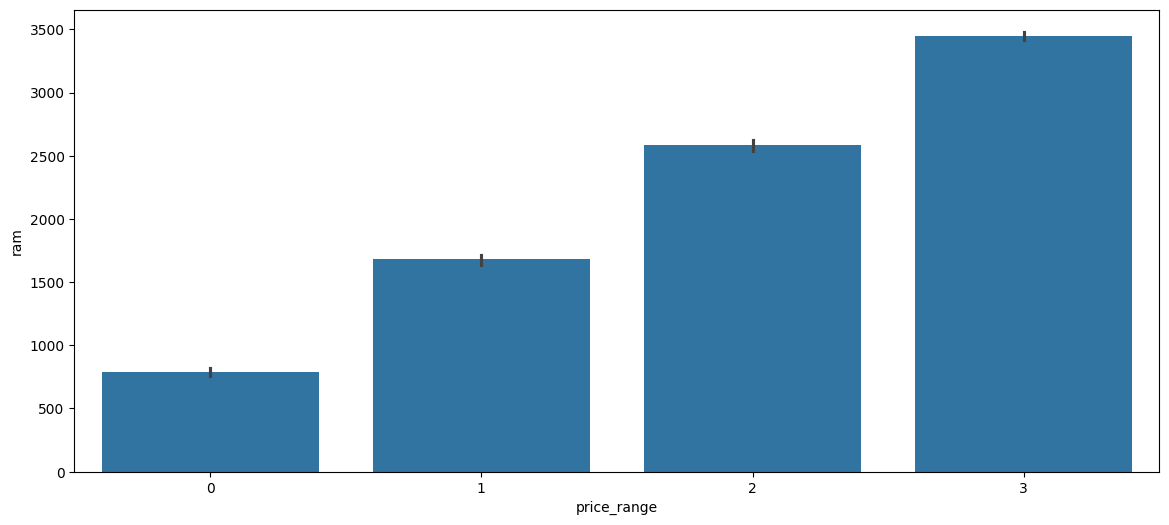

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(data = data ,x=data['price_range'],y = 'ram')

In [43]:
plt.figur

AttributeError: module 'matplotlib.pyplot' has no attribute 'figur'

### Interactive plot using Plotly

In [47]:
#Interactive plot using Plotly
import plotly.express as px
fig = px.scatter(data , x = )

SyntaxError: invalid syntax (<ipython-input-47-c4532f505f01>, line 3)

## 4- ML Model

### **Problem Statement:**
we do not have to predict actual price , but a price range indicating how high the price is

In [ ]:
data.head()

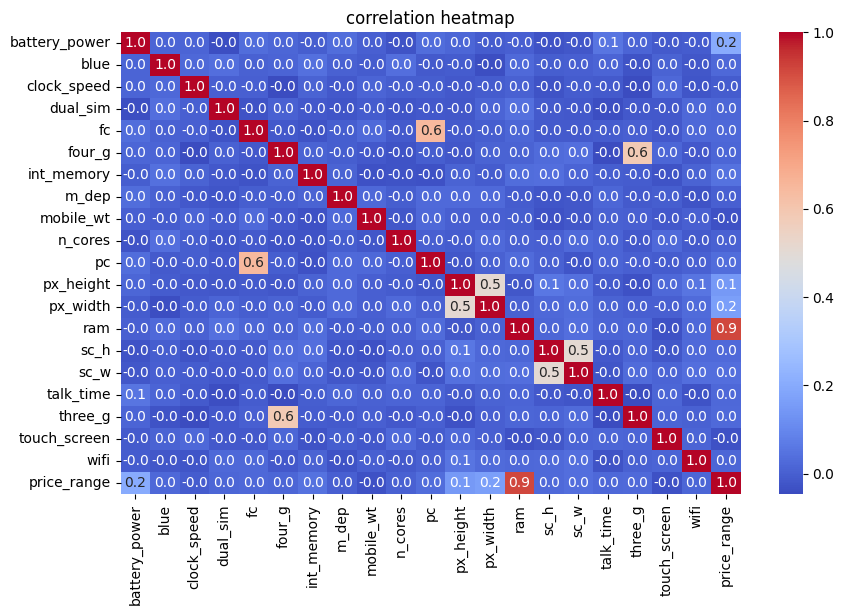

In [46]:
# -1 to +1
# Heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('correlation heatmap')
plt.show()

### Linear Regression

### Random Forest Regressor

### Support Vector Regressor (SVR)

## Final result

# Part II

## solve Q1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Python program to print Even Numbers in given range

 # solving by use for loop
# given range and read the varible from the user
start = int(input("Enter the start of range: "))
end = int(input(" end of range: "))

# Use a for loop to print the even numbersrom in given range
for num in range(start, end + 1):

    # checking condition
    if num % 2 == 0:
        print(num, end=" ")

        # solving by use  while loop
#Initialize a counter and read the varible from the user
x = int(input("Enter a number: "))
i = 1
# Use a while loop to print the even numbers from 1 to 10
while i <= x:
   # checking condition
    if i % 2 == 0:
        print(i, end=" ")
        # Increment the counter and update the even number
    i = i + 1

## solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
def grade_classifier(score) :
  score = int(input("Your score : "))
  for score in range(0,100):
    grade in ["A","B","C","D","F"]
  if score >= 60 :
    if score >= 90 :
      grade = "A"
    elif 80 <= score < 90 :
      grade = "B"
    elif 70 <= score < 80 :
      grade = "C"
    elif 60 <= score < 70 :
      grade = "D"
  else :
    grade = "F"

## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
def age_classifier(age):
  if age >= 60:
    return "senior citizen"
  elif 20 <= age <= 59:
    return "adult"
  elif 13 <= age <= 19:
    return " teenager"
  else:
    return "child"


age = int(input("enter your age: "))
result = age_classifier(age)
print(f"the user's age group is: {result}")

## solve Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [ ]:
#creat function multiply_numbers
def multiply_numbers(num1, num2):
  return num1 * num2

#test the function with values 5 and 7
multiply_numbers (5,7)

## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.